In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import sklearn

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")


TensorFlow Version: 2.19.0
Keras Version: 3.5.0
NumPy Version: 1.26.4
Pandas Version: 2.2.3
Scikit-learn Version: 1.2.2


In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df["Time"] = (df["Time"] % 86400) // 3600
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
import numpy as np
df["Time_sin"] = np.sin(2 * np.pi * df["Time"] / 24)
df["Time_cos"] = np.cos(2 * np.pi * df["Time"] / 24)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_sin,Time_cos
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,1.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.000000
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000000,1.000000
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000000,1.000000
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.258819,0.965926
284803,23.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.258819,0.965926
284804,23.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.258819,0.965926
284805,23.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.258819,0.965926


In [5]:
df.drop("Time", axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_sin,Time_cos
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,1.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000000,1.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000000,1.000000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.258819,0.965926
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.258819,0.965926
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.258819,0.965926
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.258819,0.965926


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'df' is your DataFrame
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing
X_train['Amount'] = np.log1p(X_train['Amount'])
X_test['Amount'] = np.log1p(X_test['Amount'])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Convert directly to NumPy array
X_test = scaler.transform(X_test)        # Convert directly to NumPy array

# Convert y_train and y_test to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Define the model
model = Sequential([
    Input(shape=(31,)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Class weights
num_non_fraud = (y_train == 0).sum()
num_fraud = (y_train == 1).sum()
class_weight = {0: 1, 1: num_non_fraud / num_fraud}

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    class_weight=class_weight, 
                    callbacks=[early_stopping])

Epoch 1/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8722 - loss: 0.6025 - val_accuracy: 0.9826 - val_loss: 0.1081
Epoch 2/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9526 - loss: 0.4003 - val_accuracy: 0.9896 - val_loss: 0.0774
Epoch 3/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9679 - loss: 0.3050 - val_accuracy: 0.9743 - val_loss: 0.1177
Epoch 4/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9620 - loss: 0.2868 - val_accuracy: 0.9884 - val_loss: 0.0739
Epoch 5/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9681 - loss: 0.2434 - val_accuracy: 0.9815 - val_loss: 0.0834
Epoch 6/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9659 - loss: 0.2492 - val_accuracy: 0.9730 - val_loss: 0.1043
Epoch 7/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9647 - loss: 0.2403 - val_accuracy: 0.9682 - val_loss: 0.1133
Epoch 8/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9610 - loss: 0

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

# Predict probabilities
y_pred_proba = model.predict(X_test)
# Adjust threshold (e.g., 0.5) to optimize recall, precision, F1, F2
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Precision: 0.1424
Recall: 0.9081632653061225
F1 Score: 0.24619640387275238
F2 Score: 0.43756145526057033


In [28]:
print("Metrics recorded:", history.history.keys())
print("Number of epochs:", len(history.history['loss']))
print("Final training loss:", history.history['loss'][-1])
print("Final validation loss:", history.history['val_loss'][-1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final validation accuracy:", history.history['val_accuracy'][-1])

Metrics recorded: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Number of epochs: 19
Final training loss: 0.17286095023155212
Final validation loss: 0.06577663123607635
Final training accuracy: 0.9733942151069641
Final validation accuracy: 0.9842351078987122


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

y_pred_proba = model.predict(X_test)
thresholds = [0.899, 0.9, 0.99, 0.9995, 0.9996]
for thresh in thresholds:
    y_pred = (y_pred_proba > thresh).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print(f"Threshold: {thresh:.1f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Threshold: 0.9, Precision: 0.3829, Recall: 0.8673, F1: 0.5312, F2: 0.6922
Threshold: 0.9, Precision: 0.3829, Recall: 0.8673, F1: 0.5312, F2: 0.6922
Threshold: 1.0, Precision: 0.5753, Recall: 0.8571, F1: 0.6885, F2: 0.7807
Threshold: 1.0, Precision: 0.7257, Recall: 0.8367, F1: 0.7773, F2: 0.8119
Threshold: 1.0, Precision: 0.7321, Recall: 0.8367, F1: 0.7810, F2: 0.8135


In [43]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Precision
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score

# Preprocessing (assuming 'df' is your DataFrame)
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train['Amount'] = np.log1p(X_train['Amount'])
X_test['Amount'] = np.log1p(X_test['Amount'])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Define the model
model = Sequential([
    Input(shape=(31,)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile with recall, precision, and accuracy metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall(name='recall'), Precision(name='precision')])

# Class weights (tuned for balance)
num_non_fraud = len(y_train[y_train == 0])
num_fraud = len(y_train[y_train == 1])
class_weight = {0: 1, 1: 200}  # Reduced from ~570 to prioritize recall, boost precision

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    class_weight=class_weight, 
                    callbacks=[early_stopping])

# Evaluate with threshold tuning
y_pred_proba = model.predict(X_test)
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_pred = (y_pred_proba > thresh).astype(int)
    acc = (y_pred == y_test).mean()
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print(f"Threshold: {thresh:.1f}")
    print(f"  Accuracy: {acc:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

Epoch 1/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9163 - loss: 0.3752 - precision: 0.0242 - recall: 0.8448 - val_accuracy: 0.9949 - val_loss: 0.0513 - val_precision: 0.2358 - val_recall: 0.8878
Epoch 2/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9824 - loss: 0.1904 - precision: 0.0792 - recall: 0.8684 - val_accuracy: 0.9949 - val_loss: 0.0587 - val_precision: 0.2384 - val_recall: 0.8878
Epoch 3/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9840 - loss: 0.2013 - precision: 0.0873 - recall: 0.8519 - val_accuracy: 0.9902 - val_loss: 0.0629 - val_precision: 0.1370 - val_recall: 0.8878
Epoch 4/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9837 - loss: 0.1841 - precision: 0.0819 - recall: 0.8275 - val_accuracy: 0.9930 - val_loss: 0.0501 - val_precision: 0.1853 - val_recall: 0.8980
Epoch 5/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9853 - loss: 0.1439 - precision: 0.0938 - recall: 0.8998 - val_accuracy: 0.9899

In [47]:
thresholds = [0.899, 0.9, 0.99, 0.9999, 0.99999]
for thresh in thresholds:
    y_pred = (y_pred_proba > thresh).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print(f"Threshold: {thresh:.1f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

Threshold: 0.9, Precision: 0.6385, Recall: 0.8469, F1: 0.7281, F2: 0.7950
Threshold: 0.9, Precision: 0.6385, Recall: 0.8469, F1: 0.7281, F2: 0.7950
Threshold: 1.0, Precision: 0.7257, Recall: 0.8367, F1: 0.7773, F2: 0.8119
Threshold: 1.0, Precision: 0.8163, Recall: 0.8163, F1: 0.8163, F2: 0.8163
Threshold: 1.0, Precision: 0.8229, Recall: 0.8061, F1: 0.8144, F2: 0.8094


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


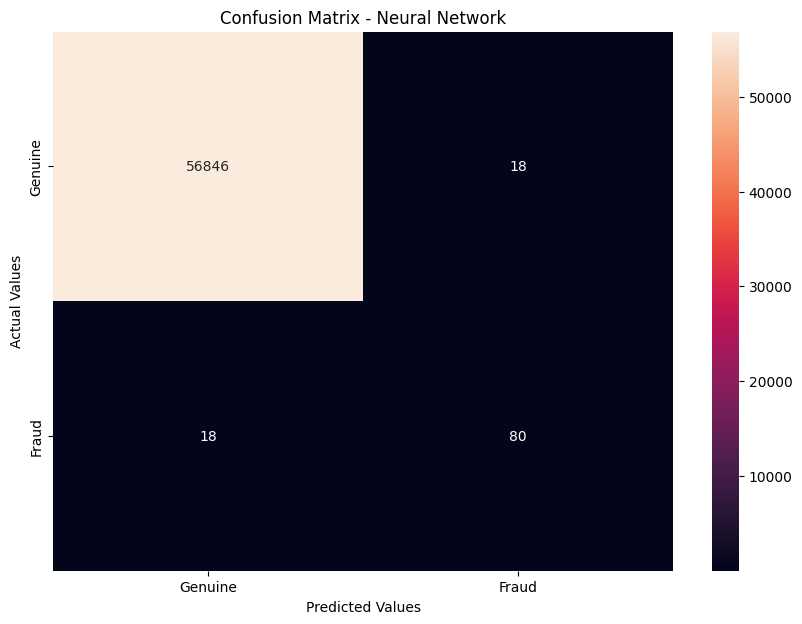

Threshold 0.9999 Metrics:
  Accuracy: 0.9966, Recall: 0.8163, Precision: 0.8163, F1: 0.8163, F2: 0.8163


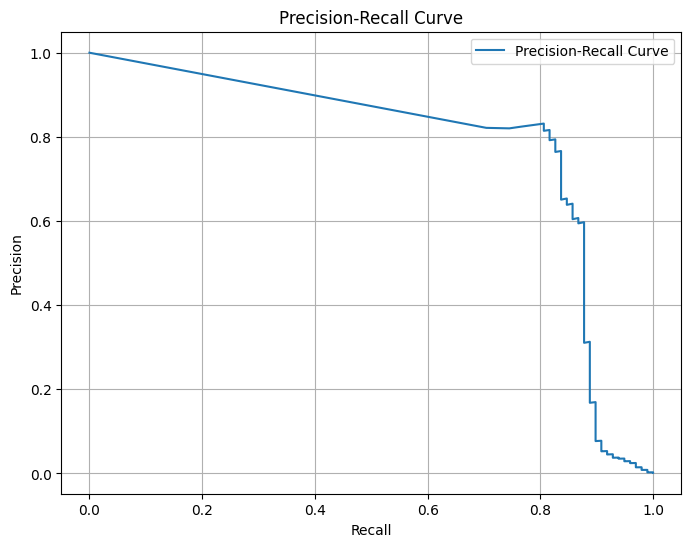

In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_curve, recall_score, precision_score, f1_score, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities
y_pred_proba = model.predict(X_test)

# --- Confusion Matrix ---
# Threshold 0.5 (default)
y_pred = (y_pred_proba > 0.9999).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Metrics at threshold 0.5
acc = (y_pred == y_test).mean()
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"Threshold 0.9999 Metrics:")
print(f"  Accuracy: {acc:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

# --- Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Metrics list with updated variable names
metrics1 = [['Accuracy', accuracy_score(y_test, y_pred)],
            ['Precision', precision_score(y_test, y_pred)],
            ['Recall', recall_score(y_test, y_pred)],
            ['F1_score', f1_score(y_test, y_pred)]]

# Create DataFrame (fixing typo from 'metrics' to 'metrics1')
metrics1_df = pd.DataFrame(metrics1, columns=['Metrics', 'Results'])

metrics1_df

,Metrics,Results
0,Accuracy,0.999368
1,Precision,0.816327
2,Recall,0.816327
3,F1_score,0.816327
